In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

### Cleaning

In [18]:
# let's take a look at our dataset
documents = pd.read_json("dataset-mie.json")
documents.head()

,title,year,journal_issn,language,abstract,doi,pmid,citation_count,IOSPressVolume,publication_type,authors,keywords,topics,affiliation_countries,affiliations
0,Using an open source observational tool to mea...,2009,0926-9630,eng,Computerization of general practice is an inte...,None,19745467,4,150,[Journal Article],"[De Lusignan, S, Kumarapeli, P, Debar, S, Kush...","[Attitude to Computers, Computer Systems, Deci...","[EPR systems, consultation, primary care compu...",[united kingdom],"[St George's University of London, London SW17..."
1,"Portable devices, sensors and networks: wirele...",2009,0926-9630,eng,The 21st century healthcare systems aim at inv...,None,19745466,7,150,"[Journal Article, Research Support, Non-U.S. G...","[Pharow, P, Blobel, B, Ruotsalainen, P, Peters...","[Health Services, Humans, Internet, Precision ...","[health services, Portable devices, portable d...",[germany],"[eHealth Competence Center, Regensburg Univers..."
2,Archetype-based knowledge management for seman...,2009,0926-9630,eng,Formal modeling of clinical content that can b...,None,19745465,13,150,[Journal Article],"[Garde, S, Chen, R, Leslie, H, Beale, T, McNic...","[Medical Record Linkage, Medical Records Syste...","[compliance templates, templates, archetype re...",[united kingdom],"[Ocean Informatics, London, UK. sebastian.gard..."
3,Is there a common background to support better...,2009,0926-9630,eng,The workshop is proposed by the EFMI WG Health...,None,19745464,0,150,[Journal Article],"[Stoicu-Tivadar, L, Blobel, B, Kern, J, Masic,...","[Education, Europe, Humans, International Coop...","[healthcare services, better healthcare, healt...",[romania],"[University Politehnica Timisoara, Romania. st..."
4,Digital pathology in Europe: coordinating pati...,2009,0926-9630,eng,The COST Action IC0604 Telepathology Network ...,None,19745463,7,150,[Journal Article],"[Garcia Rojo, M, Punys, V, Slodkowska, J, Schr...","[Biomedical Research, Europe, Humans, Medical ...","[research efforts, Anatomic Pathology, Patholo...",[spain],"[Hospital General de Ciudad Real, 13005 Ciudad..."


In [19]:
# explore dataset for different language types
documents["language"].value_counts()

eng    4565
ger      41
Name: language, dtype: int64

In [20]:
# only look at english doucments
documents = documents[documents['language'] == 'eng'][['abstract', 'keywords', 'topics', 'pmid']]
documents = documents.set_index('pmid')
documents.head()

,abstract,keywords,topics
pmid,,,
19745467,Computerization of general practice is an inte...,"[Attitude to Computers, Computer Systems, Deci...","[EPR systems, consultation, primary care compu..."
19745466,The 21st century healthcare systems aim at inv...,"[Health Services, Humans, Internet, Precision ...","[health services, Portable devices, portable d..."
19745465,Formal modeling of clinical content that can b...,"[Medical Record Linkage, Medical Records Syste...","[compliance templates, templates, archetype re..."
19745464,The workshop is proposed by the EFMI WG Health...,"[Education, Europe, Humans, International Coop...","[healthcare services, better healthcare, healt..."
19745463,The COST Action IC0604 Telepathology Network ...,"[Biomedical Research, Europe, Humans, Medical ...","[research efforts, Anatomic Pathology, Patholo..."


In [21]:
# remove the documents that are empty
documents = documents[documents["abstract"] != '']
documents.shape[0]

4497

In [22]:
words_per_document = documents["abstract"].apply(lambda x: len(x.split(" ")))
mean_words = words_per_document.mean()
std_words = words_per_document.std()
print("mean number of words:", mean_words, "standard deviation of number of words:", std_words)

mean number of words: 131.6995774961085 standard deviation of number of words: 54.8173713464437


In [23]:
max(words_per_document)

398

In [24]:
min(words_per_document)

19

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa37772310>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa377728b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa37642940>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa3761a130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa3761a970>],
 'means': []}

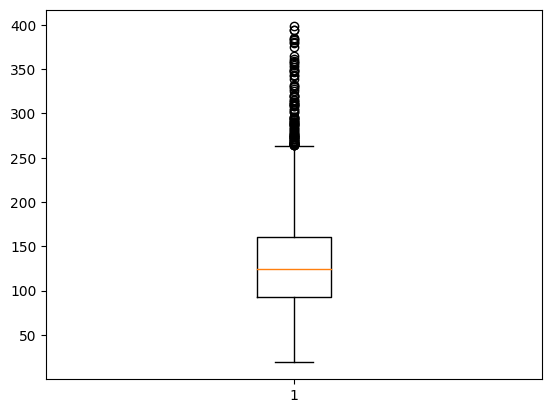

In [25]:
import matplotlib.pyplot
matplotlib.pyplot.boxplot(words_per_document)

In [30]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /Users/sarah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [60]:
#tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# List of stop words
medical_stop_words = set(["study", "patient", "data", "result", "used"])
stop_words = ENGLISH_STOP_WORDS.union(medical_stop_words)

# List of punctuation
punc = list(set(string.punctuation))

# Splits words on white spaces
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens

def process_text(text):
    
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'\d+|[^\w\s]', '', text)
    # Tokenize and lemmatize
    wnl = WordNetLemmatizer()
    tokens = [wnl.lemmatize(word) for word in casual_tokenizer(text) if word not in stop_words]
    text = [each for each in tokens if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return " ".join(text)

def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  

In [56]:
documents["abstract"][19745466]

"The 21st century healthcare systems aim at involving citizen and health professionals alike entitling especially the citizens to take over a higher level of responsibility for their own health status. Applied technologies like, e.g., Internet, notebooks, and mobile phones enable patients to actively participate in treatment and rehabilitation. It's not any longer just health cards; it's an ongoing standardized personalization of health services including application of portable devices, sensors and actuators stipulating the personalized health approach while offering chances for practicing high quality wireless personalized shared care. The path from cards to personalized and portable devices tackles aspects like health advisors, RFDI technology, the EHR, chips, and smart objects. It is important to identify criteria and factors determining the application of such personalized devices in a wirelessly operated healthcare and welfare, the paradigm change from cards to secure wireless de

In [68]:
process_text(documents["abstract"][19745466])

'st century healthcare system aim involving citizen health professional alike entitling especially citizen higher level responsibility health status applied technology like internet notebook mobile phone enable patient actively participate treatment rehabilitation longer just health card ongoing standardized personalization health service including application portable device sensor actuator stipulating personalized health approach offering chance practicing high quality wireless personalized shared care path card personalized portable device tackle aspect like health advisor rfdi technology ehr chip smart object important identify criterion factor determining application personalized device wirelessly operated healthcare welfare paradigm change card secure wireless device mobile sensor citizen acceptance underlying technology presentation workshop jointly organized efmi wg personal portable device ppd isoiec jtc group sensor network sgsn aim introducing technical approach standardizat

In [61]:
### tokenize the abstracts
documents['processed_abstracts'] = documents['abstract'].apply(process_text)
documents['processed_abstracts']

pmid
19745467    computerization general practice international...
19745466    st century healthcare system aim involving cit...
19745465    formal modeling clinical content available int...
19745464    workshop proposed efmi wg health informatics i...
19745463    cost action ic telepathology network europe eu...
                                  ...                        
39176482    advance utility synthetic hematology particula...
39176481    administrable dose form obtained notransformat...
39176480    key research area kras identified establish se...
39176479    paper present versatile solution formally repr...
39176478    international classification icdwho icdwho sex...
Name: processed_abstracts, Length: 4497, dtype: object

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer
vectorizer = CountVectorizer(max_df=0.80, min_df=5)

# Fit and transform the processed abstracts into DTM
dtm = vectorizer.fit_transform(documents['processed_abstracts'])

In [77]:
from sklearn.decomposition import NMF

# Specify the number of topics
n_topics = 20  # or any number based on your analysis needs
nmf_model = NMF(n_components=n_topics)
W = nmf_model.fit_transform(dtm)  # Document-topic matrix
H = nmf_model.components_         # Topic-term matrix

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [78]:
feature_names = vectorizer.get_feature_names_out()
for index, topic in enumerate(H):
    print(f"Topic #{index + 1}:")
    print(",".join([feature_names[i] for i in topic.argsort()[-10:]]))  # Top 10 words per topic

Topic #1:
test,algorithm,feature,classification,paper,approach,result,using,used,method
Topic #2:
informatics,ehealth,social,technology,public,professional,digital,national,service,health
Topic #3:
content,retrieval,internet,physician,communication,web,management,need,access,information
Topic #4:
tool,used,use,standard,practice,support,decision,trial,guideline,clinical
Topic #5:
network,predict,machine,prediction,used,performance,based,using,learning,model
Topic #6:
chronic,based,used,outcome,risk,cancer,group,treatment,disease,patient
Topic #7:
delivery,present,need,ai,professional,application,paper,technology,service,healthcare
Topic #8:
year,curriculum,field,text,university,education,language,student,informatics,medical
Topic #9:
shared,network,need,improve,provider,management,primary,quality,support,care
Topic #10:
mapping,semantic,language,ontology,code,term,terminology,concept,ct,snomed
Topic #11:
emr,health,access,ehrs,work,paper,document,ehr,electronic,record
Topic #12:
based,d

In [79]:
import numpy as np

# Let's say we want the topic distribution for the first document (index 0)
document_index = 0
document_topics = W[document_index]  # Get topic weights for this document

# Identify the dominant topic for this document
dominant_topic = np.argmax(document_topics)

print(f"Document #{document_index + 1} dominant topic: Topic {dominant_topic + 1}")
print(f"Topic Distribution for Document #{document_index + 1}:")
for topic_idx, weight in enumerate(document_topics):
    print(f"Topic {topic_idx + 1}: {weight:.4f}")

# Print the top words for the dominant topic to understand its meaning
top_word_indices = H[dominant_topic].argsort()[-10:]  # Top 10 words for the dominant topic
print(f"\nTop words for Dominant Topic {dominant_topic + 1}:")
print(" ".join([feature_names[i] for i in top_word_indices]))
print(documents.iloc[document_index]["keywords"])
print(documents.iloc[document_index]["abstract"])

Document #1 dominant topic: Topic 12
Topic Distribution for Document #1:
Topic 1: 0.0000
Topic 2: 0.0000
Topic 3: 0.0020
Topic 4: 0.2361
Topic 5: 0.0092
Topic 6: 0.0000
Topic 7: 0.0000
Topic 8: 0.0014
Topic 9: 0.1018
Topic 10: 0.0201
Topic 11: 0.1500
Topic 12: 0.4295
Topic 13: 0.0957
Topic 14: 0.0000
Topic 15: 0.0000
Topic 16: 0.0144
Topic 17: 0.0317
Topic 18: 0.0000
Topic 19: 0.0727
Topic 20: 0.3220

Top words for Dominant Topic 12:
based different integration ehr standard paper approach support development system
['Attitude to Computers', 'Computer Systems', 'Decision Making', 'Education', 'Family Practice', 'Humans', 'Medical Records Systems, Computerized', 'Observation', 'Outcome and Process Assessment, Health Care', 'Physician-Patient Relations', 'Referral and Consultation', 'Video Recording']
Computerization of general practice is an international phenomenon. Many of the Electronic Patient Record (EPR) systems have developed organically with considerable variation in their interf

### Run NMF